tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])
tensor([0.1740, 0.1770, 0.1610, 0.1780, 0.1620, 0.1480])
tensor([[0.1450, 0.1590, 0.1940, 0.1750, 0.1570, 0.1700],
        [0.1590, 0.1550, 0.1730, 0.1750, 0.1820, 0.1560],
        [0.1500, 0.1780, 0.1630, 0.1520, 0.1590, 0.1980],
        [0.1710, 0.1690, 0.1510, 0.1880, 0.1620, 0.1590],
        [0.1530, 0.1520, 0.1800, 0.1750, 0.1680, 0.1720],
        [0.1730, 0.1710, 0.1630, 0.1690, 0.1630, 0.1610],
        [0.1640, 0.1580, 0.1680, 0.1740, 0.1640, 0.1720],
        [0.1780, 0.1800, 0.1450, 0.1490, 0.1780, 0.1700],
        [0.1810, 0.1680, 0.1600, 0.1520, 0.1510, 0.1880],
        [0.1520, 0.1640, 0.1650, 0.1720, 0.1670, 0.1800]])

see how multinomial converged:

samples: 
tensor([[1., 2., 3., 1., 1., 2.],
        [1., 2., 2., 2., 2., 1.],
        [2., 2., 1., 1., 4., 0.],
        ...,
        [0., 5., 0., 1., 2., 2.],
        [0., 3., 2., 0., 1., 4.],
        [2., 0., 0., 2., 5., 1.]])
cumulated: 
tensor([[  1.,   2.,   3.,   1.,

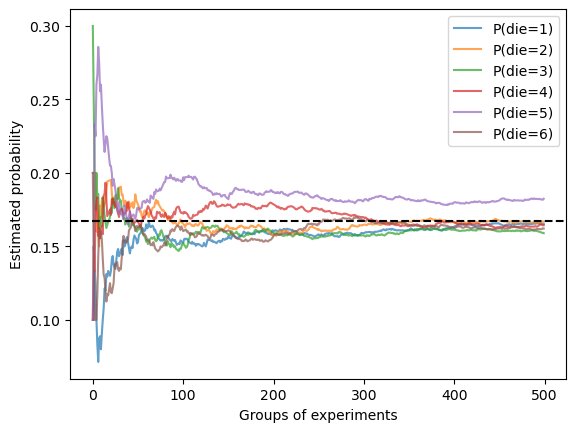

In [2]:
import torch
from torch.distributions import multinomial

# multinomial, simple discrete distribution
fair_probs = torch.ones([6]) / 6
print(fair_probs)
m = multinomial.Multinomial(1000, probs=fair_probs)
print(m.sample() / 1000)   # occurancy of every number 0, 1, 2, 3, 4, and 5 
                           # should have be closed to 0.1667(if samples are big enough)
print(m.sample((10, )) / 1000)  # samples 1000 times every experiment and 10 experiments

import matplotlib.pyplot as plt

print('\nsee how multinomial converged:\n')
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
print('samples: ')
print(counts)
cum = counts.cumsum(dim=0)                      # the more cumulated of samples, divided by 6*(experiment times), the nearer probability of 0.1667
print('cumulated: ')
print(cum)
estimates = cum / cum.sum(dim=1, keepdim=True)  # sum of dim=1 means row1 will be 6, row2 wil be 12, and rown will be 6*n
                                                # by dividing sum of dim=1, cumulated samples are actually divided by each rows'all probability.
print('estimated convergence: ')
print(estimates)

for i in range(6):
    plt.plot(estimates[:, i].numpy(), 
             label=("P(die=" + str(i + 1) + ")"), 
             alpha=0.7)
plt.xlabel('Groups of experiments')
plt.ylabel('Estimated probability')
plt.axhline(y=0.167, 
                color='black', 
                linestyle='--')
plt.legend()
plt.show()